In [1]:
%load_ext autoreload
%autoreload 2
import pickle
import numpy as np
import sys
import torch as t
import matplotlib.pyplot as plt
import glob
import seaborn as sns
from sklearn.mixture import GaussianMixture
sys.path.append('../../')
from utils.number_handler import to_numeral
import random

In [3]:
# data = np.array([1,2,3,6,7,8,9,10,11])
# data = data.reshape(-1,1)
# gmm = GaussianMixture(3, max_iter=10, n_init=1, verbose=10, init_params='random')
# gmm.fit(data)

Initialization 0
  Iteration 0	 time lapse 0.00246s	 ll change inf
Initialization converged: True	 time lapse 0.00412s	 ll -1.86883


GaussianMixture(covariance_type='full', init_params='random', max_iter=10,
        means_init=None, n_components=3, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=10,
        verbose_interval=10, warm_start=False, weights_init=None)

In [5]:
# gmm.covariances_

array([[[5.36000100e+00]],

       [[6.66667667e-01]],

       [[1.00000000e-06]]])

In [8]:
n_components = 50
gmm = GaussianMixture(n_components, max_iter=100, n_init=1, verbose=10, init_params='kmeans')
nc = pickle.load(open('../numeral_context/build/0.05Bnotable/nc.dat', 'rb'))

random.seed(100)
# unfold and shuffle nc data
data = []
for k, v in nc.items():
    if to_numeral(k) == None:
        print('invalid numeral {}'.format(k))
    else:
        data += [[to_numeral(k)]]*v

print('total number of different numerals: ', len(nc))
print('total number of numeral samples: ', len(data))

total number of different numerals:  27683
total number of numeral samples:  1226210


In [9]:
random.shuffle(data)
data = np.array(data).reshape(-1,1)
gmm.fit(data)
# gmm._initialize_parameters(data, np.random.mtrand._rand)

Initialization 0
  Iteration 0	 time lapse 13.88721s	 ll change inf
  Iteration 10	 time lapse 83.54703s	 ll change 0.00732
Initialization converged: True	 time lapse 172.34606s	 ll -8.57005


GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=50, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=10,
        verbose_interval=10, warm_start=False, weights_init=None)

In [10]:
def single_variable_gaussian(x, mu, sigma):
    return 1. / (np.sqrt(2. * np.pi) * sigma) * np.exp(-np.power((x - mu) / sigma, 2.) / 2)

def draw(gmm):
    
    info_list = [(gmm.means_[i][0],gmm.covariances_[i][0][0], gmm.weights_[i]) for i in range(len(gmm.means_))]
    print('mean, sigma, weights')
    for i in info_list:
        print(i)
    
    
    x = np.array([])
    for i in range(len(gmm.means_)):
        range_min, range_max = gmm.means_[i][0] -  gmm.covariances_[i][0] * 2, gmm.means_[i][0] +  gmm.covariances_[i][0] * 2
        x = np.append(x, np.linspace(range_min, range_max, 100))
    x.sort()
    
    sum_y = np.zeros_like(x)
    plt.figure(0)
    plt.subplot(311)
    plt.title('{} components'.format(len(gmm.means_)))
    for i in range(len(gmm.means_)):

        y = single_variable_gaussian(x, gmm.means_[i][0], gmm.covariances_[i][0])
        y[y > 1] = 0 # set to 0 for better plot!
        sum_y += y * gmm.weights_[i]
        plt.plot(x, y)
        plt.xlim(0, 1e4)
        plt.ylim(0,3e-3)
        
        plt.xlim(-1e19,1e19)
        plt.ylim(0,3e-19)
        
    plt.show()

    plt.subplot(312)

    plt.title('{} mixtures'.format(len(gmm.means_)))

    plt.plot(x, sum_y, 'g-')
    plt.xlim(0, 1e9)
    plt.ylim(0,3e-22)
    plt.show()
    
    plt.subplot(313)

    plt.title('means (log scale)'.format(len(gmm.means_)))
    hist, bins, _  = plt.hist(np.log(np.abs(gmm.means_)), bins=20,)

#     plt.ylim(0,3e-22)
    plt.show()
    

In [ ]:
gmm_25 = pickle.load(open('gmms/gmm-25.dat','rb'))
gmm_30 = pickle.load(open('gmms/gmm-30.dat','rb'))
gmm_50 = pickle.load(open('gmms/gmm-50.dat','rb'))
gmm_100 = pickle.load(open('gmms/gmm-100.dat','rb'))
gmm_200 = pickle.load(open('gmms/gmm-200.dat','rb'))
gmm_300 = pickle.load(open('gmms/gmm-300.dat','rb'))
gmm_300_fp = pickle.load(open('gmms/gmm-300-fp.dat','rb'))

mean, sigma, weights
(1253.8248039911482, 831655.3610528646, 0.9676352337690934)
(810075794964478.2, 3.0625009999999935, 8.155209955880332e-07)
(20110662522197.33, 6.720569356046972e+16, 4.89312597352819e-06)
(140737471578111.69, 0.09765724999999978, 8.155209955880332e-07)
(80738162573311.83, 0.029542015624999935, 8.155209955880332e-07)
(9781139870842.879, 7.859941835906121e+17, 2.038802488970079e-05)
(174236001894399.62, 0.1406259999999997, 8.155209955880332e-07)
(37487940468735.96, 5.225319059842657e+16, 1.6310419911760646e-06)
(70343221837823.92, 70368744177663.92, 1.6310419911760646e-06)
(-9780199423999.979, 0.000462578369140624, 8.155209955880332e-07)
(14946175811583.967, 0.0011034475097656225, 8.155209955880332e-07)
(7256228757503.984, 0.0002451406249999995, 8.155209955880332e-07)
(715334261145.5997, 1.7281746305790126e+19, 4.077604977940159e-06)
(11111109754879.975, 0.0006456838378906236, 8.155209955880332e-07)
(19358822694911.957, 0.0018473134765624958, 8.155209955880332e-07)
(

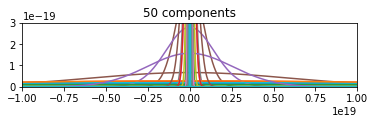

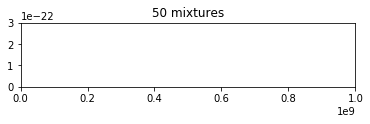

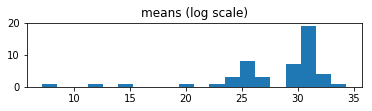

In [11]:
draw(gmm)

In [ ]:
draw(gmm_100)

In [ ]:
draw(gmm_300)

In [ ]:
draw(gmm_300)

In [ ]:
# trained_prototypes = pickle.load(open('../numeral_context/build/alpha/trained_prototypes_epoch5_300_0.5.dat', 'rb'))
# prototypes = trained_prototypes['prototypes']
prototypes = np.random.choice(data.reshape(-1), n_components)
mus = prototypes
min_sigma = 1e-6

In [ ]:
diff = np.abs(data.reshape(len(data)) - mus[:,np.newaxis])

In [ ]:
amin = np.argmin(diff, axis=0)

In [ ]:
K = len(prototypes)
clusters = [[0] for i in range(K)]
for i in range(len(data)):
    clusters[amin[i]].append(data[i])

In [ ]:
means = np.array([np.mean(i) for i in clusters]).reshape(-1,1)

In [ ]:
covs = np.array([np.std(i) if len(i) > 1 else min_sigma for i in clusters]).reshape(-1,1,1)

In [ ]:
weights = np.array([len(c) for c in clusters])

In [ ]:
weights = weights / np.sum(weights)

In [ ]:
precision = np.linalg.inv(covs)

In [ ]:
gmm = GaussianMixture(n_components, max_iter=100, n_init=1, verbose=10, means_init=means, precisions_init= precision, weights_init= weights)

In [ ]:
gmm.fit(data)

In [ ]:
draw(gmm)